# 简介
白化是机器学习中非常重要的预处理过程，其目的是降低输入数据的冗余性。经过白化处理的输入数据具有如下性质：1）特征之间相关性较低；2）特征具有相同的方差。  
白化处理主要包括：PCA白化和ZCA白化，PCA白化使得数据各个维度的方差为1，而ZCA白化则使用数据各维度的方差相同。因此，PCA白化__不仅可以去相关性，还可以用于数据降维__；而ZCA白化则主要用于去相关性，而且__尽量保证白化后的数据接近原始输入数据__。

# 预备知识
## 协方差
相对于均值、标准差和方差，协方差（Covariant）主要用于表示多维样本之间的相关关系，协方差为正时表示X和Y是正相关关系，协方差为负时表示X和Y是负相关关系，协方差为0时表示相互独立。  
通俗的理解表示两个变量在变化过程中是同方向变化还是反方向变化？同向或反向程度如何？也就是说：  
- 你变大，同时我也变大，说明两个变量是同向变化的，这时协方差就是正的。
- 你变大，同时我变小，说明两个变量是反向变化的，这时协方差就是负的。
- 从数值来看，协方差的数值越大，两个变量同向程度也就越大。反之亦然。

假设样本X和样本Y，，则协方差的公式表示为：$Cov(X,Y)=E[X-E(X)(Y-E(Y)]=\sum_{i=1}^n{(X_i-\bar X)(Y_i-\bar Y)}/{(n-1)}$。也就是说：“样本X的每个值与其均值的差”乘以“样本Y的每个值与其均值的差”得到的乘积，再对乘积每个值进行求和并求其均值（其实就是期望值）。  
假设有n维数据，为了表示每一对维度之间的相关关系，就需要一个$C_n^2\times C_n^2$的__协方差矩阵__。例如对于3维样本数据[x,y,z]，则对应的协方差矩阵为：  
    $$\begin{matrix}
        cov(x,x) & cov(x,y) & cov(x,z) \\
        cov(y,x) & cov(y,y) & cov(y,z) \\
        cov(z,x) & cov(z,y) & cov(z,z)
    \end{matrix}$$

## 特征值和特征向量
若$AX=A\lambda$，则$\lambda$是矩阵A的特征值，X的列向量则是特征值对应的特征向量。可以理解为：矩阵A作用于矩阵X，仅仅使得矩阵X的尺度发生了变化，其缩放比例就是对应的特征值$\lambda$。__特征向量表示矩阵应用任何线性变换后方向保持不变的向量。__  
假设A为n阶可逆矩阵，则X和$\P^{-1}AP$相似，而相似矩阵具有相同的特征值。  
当A是对称矩阵时，A的特征值就是A的奇异值，存在下次矩阵Q（$Q^{-1}=Q^T$，使得：  
$$Q^T A Q=\begin{pmatrix} \lambda_1 & & & \\ & \lambda_2 & & \\ & & \ddots & \\ & & & \lambda_n \end{pmatrix}$$

In [3]:
import matplotlib.pyplot as plt
import numpy as np

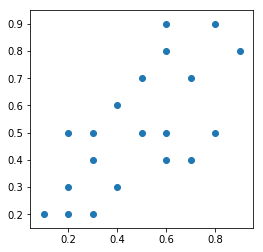

In [86]:
data = [[0.3,0.5],[0.4,0.3],[0.7,0.4],[0.5,0.7],[0.3,0.2],[0.9,0.8],[0.1,0.2],
        [0.2,0.5],[0.6,0.9],[0.2,0.2],[0.6,0.8],[0.4,0.6],[0.3,0.4],[0.6,0.5],
        [0.8,0.5],[0.8,0.9],[0.2,0.3],[0.7,0.7],[0.5,0.5],[0.6,0.4]]
data = np.array(data).T
plt.figure(figsize=(4,4))
plt.scatter(data[0,:], data[1,:])
plt.show()

# PCA计算过程
## 数据零均值化
PCA的第一步对于第个样例减去对应样本的均值，也就是对数据做平均使其均值为零。

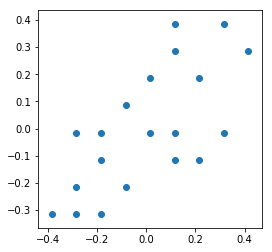

In [90]:
m_data = data - np.mean(data, axis=1).reshape((-1,1))
plt.figure(figsize=(4,4))
plt.scatter(m_data[0,:], m_data[1,:])
plt.show()

## 建立协方差矩阵
协方差矩阵中的值用于减少数据集维度的变量之间的线性依赖关系。

In [91]:
data_cov = np.cov(data)
print(data_cov)

[[ 0.05397368  0.03602632]
 [ 0.03602632  0.05081579]]


## 确定特征值和特征向量
对于每个数据集都可以计算其特征向量，特征向量的数量等于数据的维度。根据上述协方差矩阵计算确定样本数据的特征值和特征向量。

eigenvalues= [ 0.08845564  0.01633384]
eigenvectors= [[ 0.72242148 -0.69145297]
 [ 0.69145297  0.72242148]]


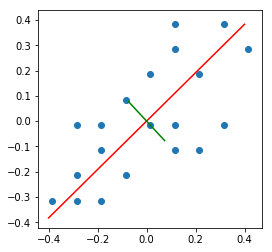

In [96]:
eig_val, eig_vec = np.linalg.eig(data_cov)
print('eigenvalues=', eig_val)
print('eigenvectors=', eig_vec)

plt.figure(figsize=(4,4))
plt.scatter(m_data[0,:], m_data[1,:])
length = 0.4 * eig_val[1]/eig_val[0]
kline = eig_vec[1,0]/eig_vec[0,0]
plt.plot([-0.4, 0.4], [-0.4*kline, 0.4*kline], 'r')
kline = eig_vec[1,1]/eig_vec[0,1]
plt.plot([-length, length], [-length*kline, length*kline], 'g')
plt.show()

由于上述特征值和特征向量是根据协方差矩阵计算的，所以特征向量表示数据具有更多方差的方向；另一方面，它们各自的特征值决定数据集在该方向上具有的方差量。我们可以根据特征向量对数据进行变换。  
将特征值按照从大到小的顺序排序，选择其中最大的k个，然后将其对应的k个特征向量分别作为列向量组成特征向量矩阵。这里特征值只有两个，我们选择其中最大的那个特征值及其对应的特征向量。

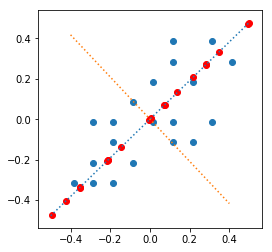

In [98]:
trans_data = np.dot(eig_vec[:,0], m_data)
plt.figure(figsize=(4,4))
plt.scatter(m_data[0,:], m_data[1,:])

kline = eig_vec[1,0]/eig_vec[0,0]
plt.plot([-0.5, 0.5], [-0.5*kline, 0.5*kline], ':')
kline2 = eig_vec[1,1]/eig_vec[0,1]
plt.plot([-0.4, 0.4], [-0.4*kline2, 0.4*kline2], ':')
plt.scatter(trans_data, trans_data*kline, c='r')
plt.plot()
plt.show()

如上图所示，红色点表示预处理后的样本点，斜着的两条虚线就分别是正交的特征向量（由于协方差矩阵是对称的，因此其特征向量正交），矩阵和最大特征值对应的特征向量相乘就是将原始样本点投影到特征向量对应的坐标轴上，由于选择最大的特征值对应的特征向量，则相当于对数据进行__降维__。

# PCA白化

PCA白化指将数据X经过PCA降维为Z，满足白化的第一个条件：Z中每一维是独立的。接下来只需要将数据的方差划为1，即将Z中的每一维都除以标准差从而使得每一维的方差为1。PCA白化的公式为：$X_{PCAwhiten,i}=\frac{X_{rot,i}}{\sqrt{\lambda_i+\epsilon}}$。其中$X_{rot}=U^T\times X$表示进行PCA转换后的样本。

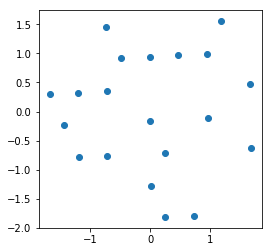

In [102]:
eps = 1e-5
rot_data = np.dot(eig_vec.T, m_data)
rot_data = rot_data / np.sqrt(eig_val+eps).reshape((-1,1))
plt.figure(figsize=(4,4))
plt.scatter(rot_data[0, :], rot_data[1, :])
plt.show()

# ZCA白化
相对于PCA白化，ZCA白化不需要对数据进行PCA转换，因此ZCA白化和PCA白化之间的关系：$X_{ZCAwhiten}=U\times X_{PCAwhiten}$,其中U表示特征向量矩阵。

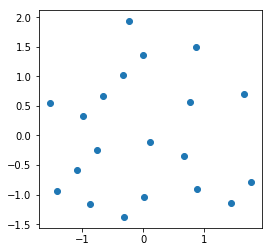

In [101]:
rot_data = np.dot(eig_vec, rot_data)
plt.figure(figsize=(4,4))
plt.scatter(rot_data[0, :], rot_data[1, :])
plt.show()

# 参考
1. [如何通俗易懂地解释「协方差」与「相关系数」的概念？](https://www.zhihu.com/question/20852004/answer/134902061)
2. [主成分分析PCA - Orisun - 博客园](https://www.cnblogs.com/zhangchaoyang/articles/2222048.html)
3. [主成份分析(PCA)原理详解 - CSDN博客](http://blog.csdn.net/zhongkelee/article/details/44064401)